<a href="https://colab.research.google.com/github/Guadalescano/water_quality/blob/main/water_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import kagglehub
from kagglehub import KaggleDatasetAdapter

In [ ]:
# Esto es una prueba guardada el 12/5

In [ ]:
# Objetivo: Predecir si el agua es potable o no.

In [ ]:
df = pd.read_csv('Water_Quality_Prediction2.csv')

In [ ]:
df.shape

(1048575, 24)

In [ ]:
df.dtypes

,0
Index,int64
pH,float64
Iron,float64
Nitrate,float64
Chloride,float64
Lead,float64
Zinc,float64
Color,object
Turbidity,float64
Fluoride,float64


In [ ]:
# Columnas que tienen datos faltantes
df.isna().sum()


,0
Index,0
pH,20231
Iron,6991
Nitrate,18695
Chloride,30834
Lead,4684
Zinc,27675
Color,981
Turbidity,8694
Fluoride,33218


In [ ]:
max_missing = df.isna().sum().max()  # Calculo el maximo valor faltante
print(f"El valor maximo de faltantes es de {max_missing}")

El valor maximo de faltantes es de 34882


In [ ]:
df = df.rename(columns={
    'Index': 'Índice',
    'pH': 'pH',
    'Iron': 'Plata',
    'Nitrate': 'Nitrato',
    'Chloride': 'Cloruros',
    'Lead': 'Plomo',
    'Zinc': 'Zinc',
    'Color': 'Color',
    'Turbidity': 'Turbidez',
    'Fluoride': 'Fluoruro',
    'Copper': 'Cobre',
    'Odor': 'Olor',
    'Sulfate': 'Sulfatos',
    'Conductivity': 'Conductividad',
    'Chlorine': 'Cloro residual libre',
    'Manganese': 'Manganeso',
    'Total Dissolved Solids': 'Sólidos disueltos totales',
    'Source': 'Fuente',
    'Water Temperature': 'Temperatura del agua',
    'Air Temperature': 'Temperatura del aire',
    'Month': 'Mes',
    'Day': 'Día',
    'Time of Day': 'Hora del día',
    'Target': 'Objetivo'
})


In [ ]:
df.columns

Index(['Índice', 'pH', 'Plata', 'Nitrato', 'Cloruros', 'Plomo', 'Zinc',
       'Color', 'Turbidez', 'Fluoruro', 'Cobre', 'Olor', 'Sulfatos',
       'Conductividad', 'Cloro residual libre', 'Manganeso',
       'Sólidos disueltos totales', 'Fuente', 'Temperatura del agua',
       'Temperatura del aire', 'Mes', 'Día', 'Hora del día', 'Objetivo'],
      dtype='object')



---

# Limpieza de los datos de la columna pH 🎯




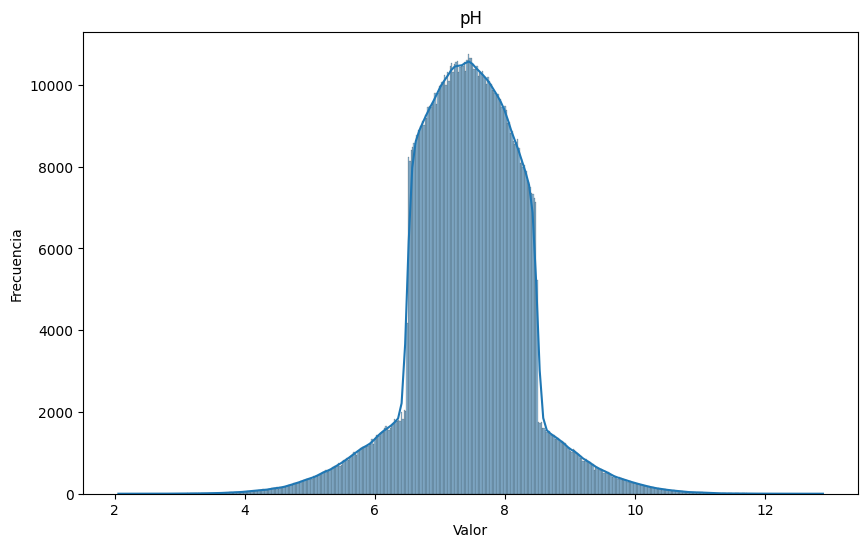

In [ ]:
# Observamos la distribuición de la columna pH:
plt.figure(figsize=(10, 6))
sns.histplot(df['pH'], kde=True)
plt.title('pH')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [ ]:
df['pH'].describe()

,pH
count,1.028344e+06
mean,7.449869e+00
std,8.478455e-01
min,2.058008e+00
25%,6.914812e+00
50%,7.452940e+00
75%,8.001406e+00
max,1.289196e+01


In [ ]:
#Eliminar outliers de la fila pH
col = 'pH'  # ejemplo
Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
df = df[(df[col] >= Q1 - 1.5 * IQR) & (df[col] <= Q3 + 1.5 * IQR)]
df['pH'].isna().sum() #Analizo si hay valor nulos, me da 0.
df['pH'].describe()


,pH
count,1.001862e+06
mean,7.457863e+00
std,7.404621e-01
min,5.284968e+00
25%,6.932734e+00
50%,7.455978e+00
75%,7.989647e+00
max,9.631287e+00


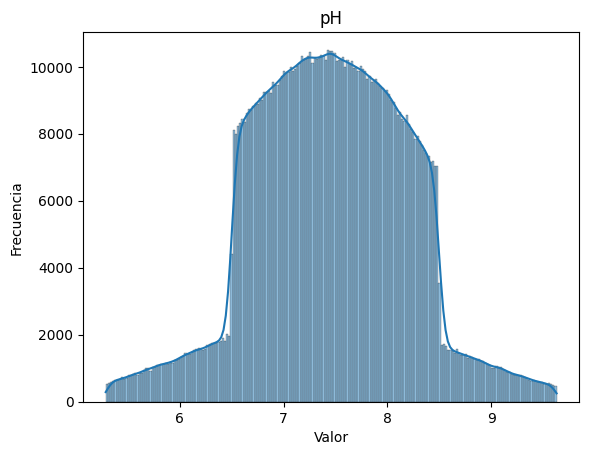

In [ ]:
plt.figure()
sns.histplot(df['pH'], kde=True)
plt.title('pH')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

Análisis de pH 📝
Después de eliminar los valores nulos y los outliers en la columna pH, se observaron variaciones significativas en las estadísticas descriptivas. Se eliminaron aproximadamente 29,870 observaciones, principalmente debido a valores extremos o faltantes.

En cuanto a la media, hubo un ligero aumento, pasando de 7.45 a 7.46, lo que sugiere que los valores atípicos eliminados estaban en su mayoría por debajo del promedio general. La desviación estándar también se redujo notablemente de 0.85 a 0.73, lo que indica que los datos restantes están ahora más concentrados alrededor de la media, con menos dispersión.

El valor mínimo cambió de 2.06 a 5.36 y el máximo de 12.89 a 9.57, lo que confirma que se eliminaron los valores más extremos en ambos extremos del rango. Asimismo, los percentiles (25%, 50% y 75%) se ajustaron ligeramente, reflejando una distribución más limpia y estable


---

# Limpieza de los datos de la columna Hierro🎯


In [ ]:
df['Plata'].describe()

,Plata
count,9.951790e+05
mean,1.100662e-01
std,4.326623e-01
min,2.050000e-53
25%,8.720000e-06
50%,2.002525e-03
75%,4.846903e-02
max,1.574860e+01


In [ ]:
col_p = 'Plata'
q1p = df[col_p].quantile(0.25)
q3p = df[col_p].quantile(0.75)
iqrp = q3p - q1p
df = df[(df[col_p] >= q1p - 1.5 * iqrp) & (df[col_p] <= q3p + 1.5 * iqrp)]
print(df[col_p].describe())

count    8.360630e+05
mean     1.341934e-02
std      2.596650e-02
min      2.050000e-53
25%      2.190000e-06
50%      5.091770e-04
75%      1.223309e-02
max      1.211564e-01
Name: Plata, dtype: float64


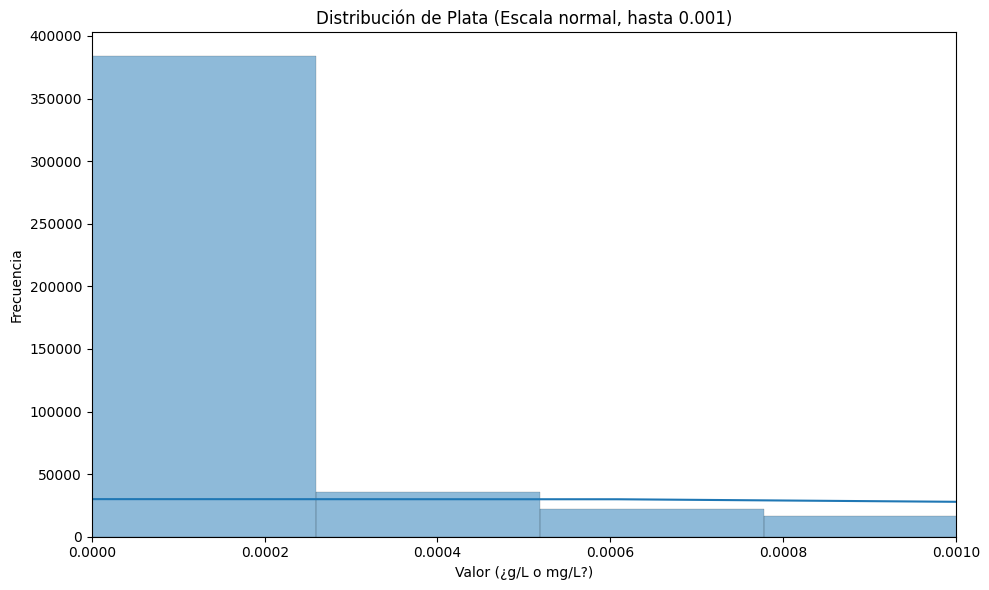

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear figura y ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Histograma normal acotado hasta 0.001
sns.histplot(df['Plata'], kde=True, ax=ax)

# Acotar eje X para observar mejor valores pequeños
ax.set_xlim(0, 0.001)

# Agregar títulos y etiquetas
ax.set_title('Distribución de Plata (Escala normal, hasta 0.001)')
ax.set_xlabel('Valor (¿g/L o mg/L?)')  # Cambiar al confirmar la unidad
ax.set_ylabel('Frecuencia')

# Ajustar presentación
plt.tight_layout()
plt.show()

---

# Limpieza de los datos de la columna x🎯

In [ ]:
#¿Eliminar los datos que indican que el pH del agua no es potable?
#No eliminar datos fuera del estándar de potabilidad, como un pH fuera de 5.5–9.5, si esos valores son físicamente posibles y ocurren en la realidad.
#Esos datos no son "erróneos", son ejemplos negativos importantes para que el modelo aprenda a distinguir entre agua potable y no potable.
#Solo eliminar valores físicamente imposibles o errores claros, como pH negativos, nulos mal imputados, o valores duplicados sin sentido.

In [ ]:
# Filtrar pH negativos ph_negativos = df[df['pH'] > 0] - No hay
# Mal imputados (ej: pH = 0 exactamente. - No hay
#ph_igual_cero = df[df['pH'] == 0]
#print(ph_igual_cero)

In [ ]:
#Evaluar la importancia de cada variable para el objetivo (‘potable’ o no), y decidir si su ausencia afecta el aprendizaje del modelo

In [ ]:
#df_sinpHnulos = df_sinpHnulos.drop(['Month', 'Day', 'Time of Day'], axis=1)
#Ver la distribuicion de las columnas Month , Day y Time of Day

In [ ]:
# Columnas que tienen datos faltantes
df_sinpHnulos.isna().sum()

AttributeError: 'numpy.int64' object has no attribute 'isna'

In [ ]:
# Ver distribuicion de las columnas más relevantes:
columnas = ['Mes', 'Día', 'Hora del día']

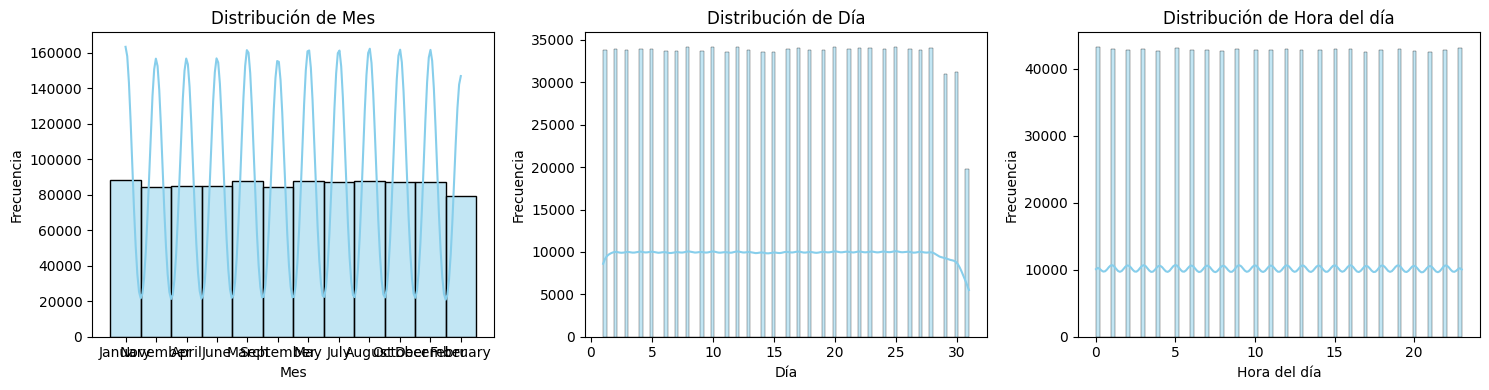

In [ ]:
#No se comprenden bien los datos, para mi borrar, y analizar despues de eliminar los nulos

fig, axes = plt.subplots(1, len(columnas), figsize=(5 * len(columnas), 4))

for i, col in enumerate(columnas):
    sns.histplot(df[col], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


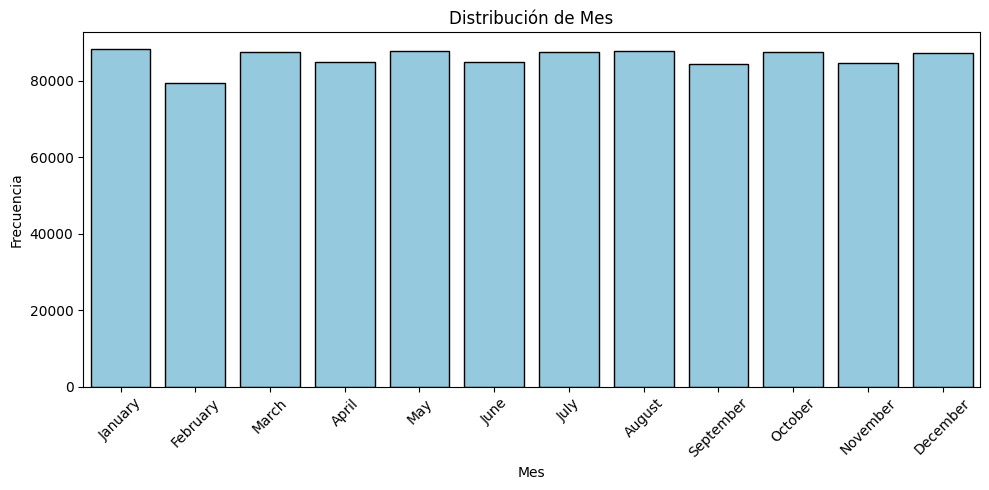

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Asegura que los meses estén en orden correcto
orden_meses = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Mes', order=orden_meses, color='skyblue', edgecolor='black')

plt.title('Distribución de Mes')
plt.xlabel('Mes')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)  # Rota las etiquetas para mejor lectura
plt.tight_layout()
plt.show()